# CRWA Data Summary
In this notebook, we summarize the data we have on hand from the CRWA's water sample database, `CRWA_Sampling_Database_20191119_LLK.accdb`. The original data is stored in a zip file in the `/data/charles_river_samples_access` folder, but we will be summarizing a version of the data that has been exported to csv and subsequently processed, located in the `/data/charles_river_samples_interim` folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
import datetime
import sys

In [2]:
for file in os.listdir("../data/charles_river_samples_interim/"):
    print(file)

results_merged.csv
results_merged_cleaned.csv
simple_db_merge.py


In [26]:
data_dir = "../data/charles_river_samples_csv/"
df_dict = {file[:-4]:pd.read_csv(data_dir+file, encoding="latin-1") for file in os.listdir(data_dir)}

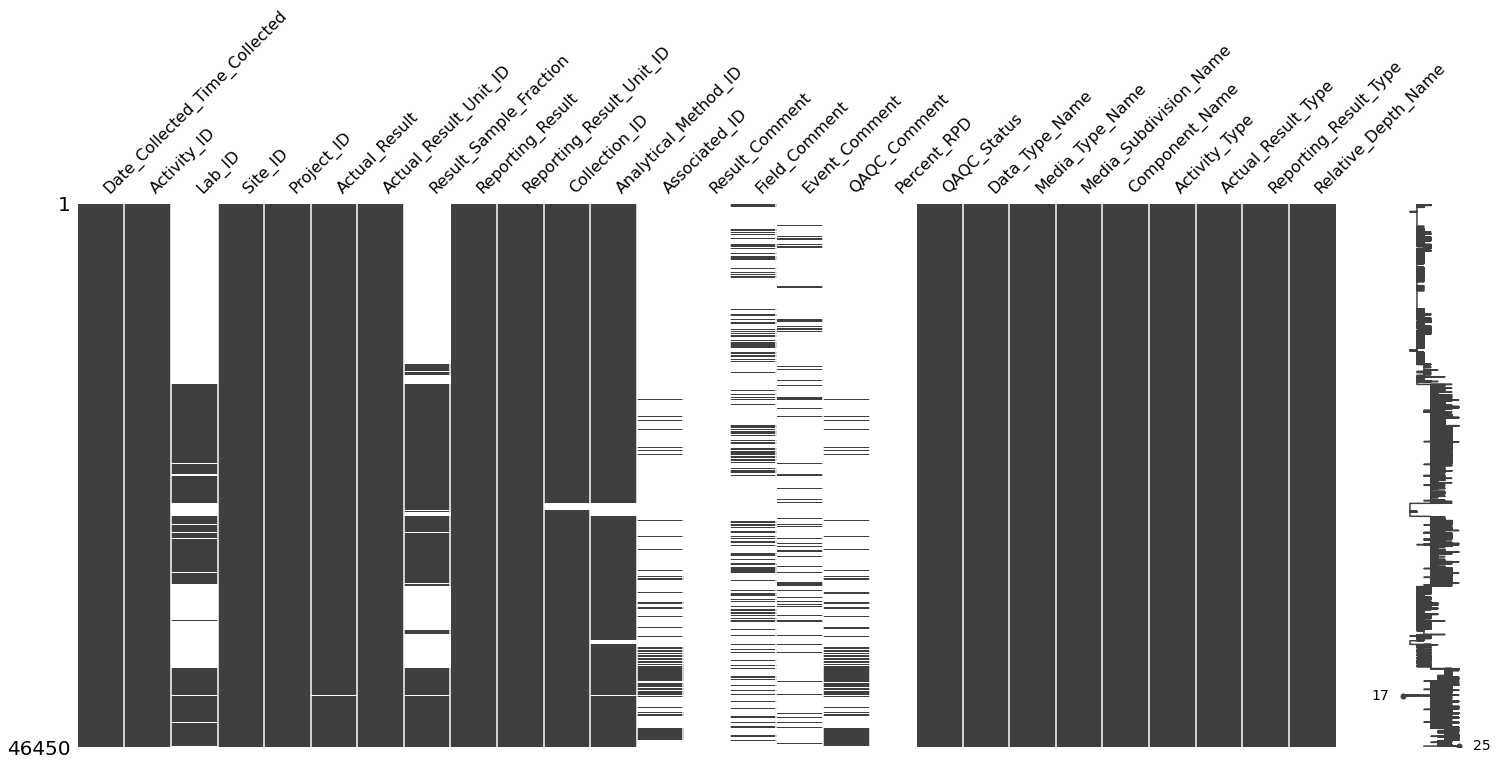

In [28]:
results = pd.read_csv("../data/charles_river_samples_interim/results_merged_cleaned.csv", parse_dates=["Date_Collected_Time_Collected"])
msno.matrix(results);

In [4]:
with pd.option_context("display.max_columns", None):
    display(results)

,Date_Collected_Time_Collected,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,Analytical_Method_ID,Associated_ID,Result_Comment,Field_Comment,Event_Comment,QAQC_Comment,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Actual_Result_Type,Reporting_Result_Type,Relative_Depth_Name
0,2016-04-12 05:58:00,720160412ROV1DTH01,NaN,ROV1,7,0.67,5,NaN,0.67,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water very still,NaN,NaN,372.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
1,2016-05-17 05:58:00,720160517ROV1DTH01,NaN,ROV1,7,0.46,5,NaN,5.50,5,N-MGBN,Field-Depth-2012,NaN,NaN,NaN,NaN,NaN,2.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
2,2016-07-19 06:45:00,720160719ROV1DTH01,NaN,ROV1,7,0.33,5,NaN,0.33,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water wasn't deep enough to use basket sampler...,NaN,NaN,2.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
3,2016-07-19 07:00:00,720160719ROV2DTH01,NaN,ROV2,7,0.5,5,NaN,0.50,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water was stagnant in wide area after narrow r...,NaN,NaN,4.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
4,2016-08-16 07:17:00,720160816ROV1DTH01,NaN,ROV1,7,0.33,5,NaN,0.33,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water very low,NaN,NaN,6.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46445,2008-08-11 09:46:39,FLG200808113BUTemp03,NaN,3BU,3,20.36,4,Total,20.36,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46446,2008-08-11 09:15:20,FLG200808114LONGTemp02,NaN,4LONG,3,21.33,4,Total,21.33,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46447,2008-08-11 09:15:31,FLG200808114LONGTemp03,NaN,4LONG,3,21.33,4,Total,21.33,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46448,2008-08-11 09:21:29,FLG200808114LONGTemp05,NaN,4LONG,3,21.31,4,Total,21.31,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom


In [5]:
results.describe()

,Project_ID,Actual_Result_Unit_ID,Reporting_Result,Reporting_Result_Unit_ID,Result_Comment,Percent_RPD
count,46450.000000,46450.000000,46440.000000,46450.000000,0.0,67.000000
mean,5.679828,6.875371,497.739589,6.443380,NaN,10.761194
std,2.215773,3.830432,6138.796986,3.313003,NaN,45.420623
min,1.000000,-1.000000,-6.000000,1.000000,NaN,1.000000
25%,3.000000,4.000000,2.500000,4.000000,NaN,2.000000
50%,7.000000,5.000000,11.000000,5.000000,NaN,2.000000
75%,7.000000,10.000000,61.475000,10.000000,NaN,5.000000
max,7.000000,16.000000,500000.000000,15.000000,NaN,372.000000


In [6]:
results["Date_Collected_Time_Collected"].isna().sum()

0

In [7]:
results.set_index("Date_Collected_Time_Collected", inplace=True)
results.sort_index(inplace=True, ascending=False)

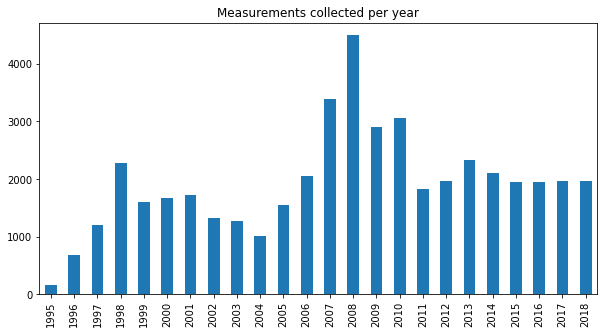

In [22]:
ax = results.resample("Y").count()["Activity_ID"].plot(kind="bar", figsize=(10,5));
ax.set_xticklabels(range(1995, 2019));
ax.set_title("Measurements collected per year");
ax.set_xlabel("");

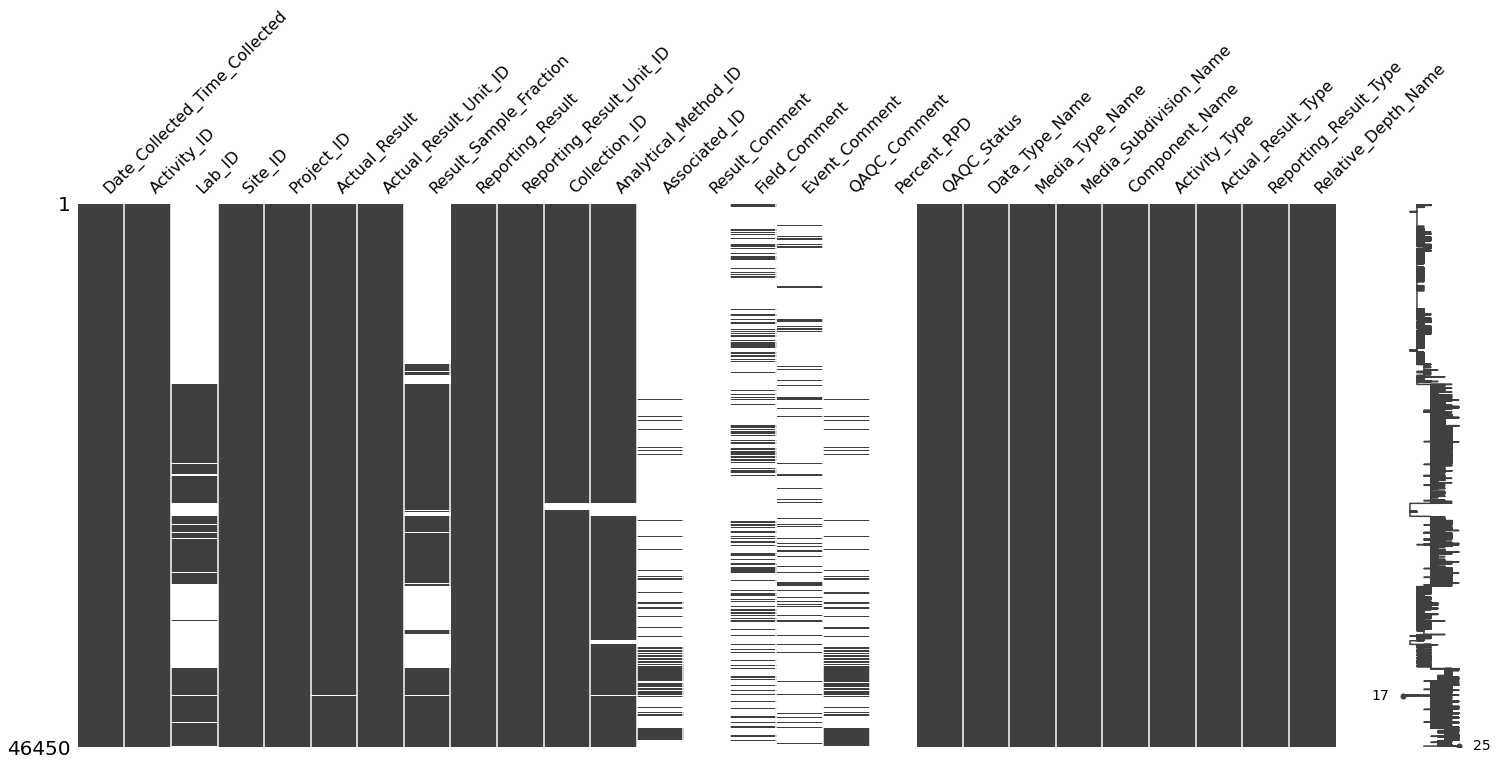

In [29]:
msno.matrix(results);

In [14]:
results.sort_index()

,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,...,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Actual_Result_Type,Reporting_Result_Type,Relative_Depth_Name
Date_Collected_Time_Collected,,,,,,,,,,,,,,,,,,,,,
1995-06-06 06:00:00,VMM19950606567STemp01,NaN,567S,7,22.3,4,NaN,22.300000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606621STemp01,NaN,621S,7,22.6,4,NaN,22.600000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606534STemp01,NaN,534S,7,23,4,NaN,23.000000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606521STemp01,NaN,521S,7,27.6,4,NaN,27.600000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606648STemp01,NaN,648S,7,22.8,4,NaN,22.800000,4,N-MGBO,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-11 06:20:00,VMM20181211012SNN01,3957695,012S,7,0.685,7,Total,0.685000,7,C-BABR,...,NaN,Final/Accepted,Critical,Water,Surface Water,Inorganic nitrogen (nitrate and nitrite),Sample-Routine,Actual,Actual,Surface
2018-12-11 06:20:00,VMM20181211012STSS01,3957739,012S,7,<5.00,7,Total,2.500000,7,C-BABR,...,NaN,Final/Accepted,Critical,Water,Surface Water,Total suspended solids,Sample-Routine,Actual,Calculated,Surface
2018-12-11 06:20:00,VMM20181211012SDTH01,NaN,012S,7,4.3333333333,5,NaN,4.333333,5,N-DL,...,NaN,Final/Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface


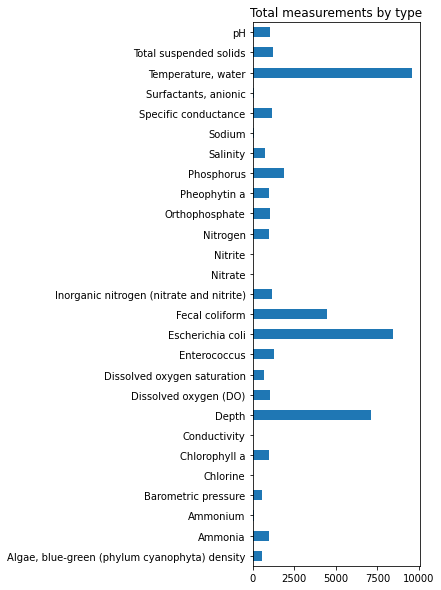

In [50]:
ax1=results.groupby("Component_Name").count()["Date_Collected_Time_Collected"].plot(kind="barh", figsize=(3,10));
# ax.set_xticklabels(range(1995, 2019));
ax1.set_title("Total measurements by type");
ax1.set_ylabel("");

In [39]:
with pd.option_context("display.max_columns", None):
    display(results.groupby(["Component_Name","Reporting_Result_Unit_ID"]).describe()["Reporting_Result"])

count  \
Component_Name                                Reporting_Result_Unit_ID           
Algae, blue-green (phylum cyanophyta) density 2                          341.0   
                                              15                         255.0   
Ammonia                                       7                         1007.0   
Ammonium                                      7                           66.0   
Barometric pressure                           9                          583.0   
Chlorine                                      7                           28.0   
Chlorophyll a                                 8                           13.0   
                                              13                         986.0   
Conductivity                                  14                          24.0   
                                              15                          30.0   
Depth                                         5                         6756.0   
                                              6                          385.0   
Dissolved oxygen (DO)                         1                          176.0   
                                              7                          861.0   
Dissolved oxygen saturation                   1                          673.0   
Enterococcus                                  3                          541.0   
                                              10                         763.0   
Escherichia coli                              3                         2554.0   
                                              10                        5860.0   
Fecal coliform                                3                         4183.0   
                                              10                         275.0   
Inorganic nitrogen (nitrate and nitrite)      7                         1148.0   
Nitrate                                       7                           21.0   
Nitrite                                       7                           20.0   
Nitrogen                                      7                         1014.0   
Orthophosphate                                7                         1031.0   
Pheophytin a                                  13                         977.0   
Phosphorus                                    3                           10.0   
                                              7                         1887.0   
                                              14                           8.0   
Salinity                                      12                         776.0   
Sodium                                        7                          110.0   
Specific conductance                          14                         644.0   
                                              15                         507.0   
Surfactants, anionic                          7                           97.0   
Temperature, water                            4                         9579.0   
Total suspended solids                        7                         1225.0   
pH                                            11                        1026.0   

                                                                                mean  \
Component_Name                                Reporting_Result_Unit_ID                 
Algae, blue-green (phylum cyanophyta) density 2                         24178.885630   
                                              15                            0.011873   
Ammonia                                       7                             0.094934   
Ammonium                                      7                             0.754242   
Barometric pressure                           9                           759.228902   
Chlorine                                      7                             0.000000   
Chlorophyll a                                 8                            12.426231   


In [41]:
df_dict["Reporting_Result_Units"]

,Unit_ID,Unit_Abbreviation,Unit_Description
0,1,% Sat,Percent Saturation
1,2,cells/ml,Cells per Milliliter
2,3,cfu/100ml,Colony Forming Units per 100 Milliliters
3,4,deg C,Degrees Celsius (Centigrade)
4,5,ft,Feet
5,6,m,Meters
6,7,mg/l,Milligrams per Liter
7,8,mg/m3,Milligrams per Cubic Meter
8,9,mmHg,"Pressure, Millimeters of Mercury"
9,10,MPN/100ml,Most Probable Number per 100 Milliliters
